In [1]:
from vizic import *
import pandas as pd
import numpy as np
from ipywidgets import *
url = NotebookUrl()
url

In [2]:
c = Connection(url = url.nb_url)

In [3]:
g = GridLayer(c, collection="vizic", scale_r=2)
m = AstroMap(default_tiles=g, zoom=1)
cp = LayerColorPicker(layer=g, concise=True) # color picker (single)
p = PopupDis(layer=g) # catalog display for clicking
hb = HomeButton(m) # home button
s = SelectionTrig(m) # selection tool trigger
s.link()
get = GetDataButton(g) # retrieve data for selection
# color map
cdrop = CFDropdown(g); g.custom_c = True
# filter widget
f = FilterWidget(g)
g.filter_obj = True
f.link()

Mongodb collection name is vizic


In [4]:
# create custom GUI
accordion = Accordion(children=[cdrop, f, p])
accordion.set_title(2, 'Object Catalog')
accordion.set_title(0, 'Color by Property')
accordion.set_title(1, 'Filter Objects')
accordion.layout.width = '50%'
accordion.layout.overflow_x = 'scroll'

In [5]:
app = HBox([m, VBox([hb, s, get, cp]), accordion]); app

In [7]:
# selection tool return data
g.select_data.tail(n=2)

,CLEAN,DEC,G,I,OBJID,PETROR90_R,Q_R,R,RA,RADIUS,TYPE,U,U_R,Z,ZS
15,1.0,5.038412,20.21681,20.21681,1.237656e+18,6.211056,0.149569,20.21681,228.98218,6.211056,3.0,20.21681,0.206719,20.21681,0.142595
16,1.0,5.094063,24.38345,24.38345,1.237656e+18,3.037672,-0.153382,24.38345,228.99356,3.037672,3.0,24.38345,0.242881,24.38345,0.000034


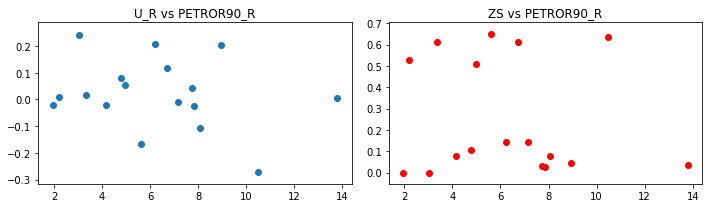

In [8]:
# explore patterns within returned catalog
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1); ax1.scatter(g.select_data.PETROR90_R, g.select_data.U_R); ax1.set_title('U_R vs PETROR90_R')
ax2 = fig.add_subplot(1,2,2); ax2.scatter(g.select_data.PETROR90_R, g.select_data.ZS, c='r'); ax2.set_title('ZS vs PETROR90_R')
plt.tight_layout()